# Lab 4: Linear Regression with Multiple Variables
---

<img src="Multiple.jpg" height= 450px width= 70%>

---
## Objective
To understand and implement Multiple Linear Regression, where multiple independent 
variables influence the dependent variable. This lab will focus on core concepts, 
assumptions, and practical implementation using Python. Students will learn to visualize 
relationships, interpret results, and evaluate model performance.
Prerequisites:
- Knowledge of basic Python programming.
- Familiarity with libraries: Pandas, NumPy, Matplotlib, and Scikit-learn.
- Understanding of Simple Linear Regression and its assumptions.
---

## Theory: Evaluating Multiple Linear Regression Models
Key Metrics:
1. Mean Squared Error (MSE): Measures the average squared error between predicted 
and actual values.
2. R-squared (R²): Explains the proportion of variance in y explained by x variables.<br>
<br>
<img src="R_square_formula.png" >
---
Visualization:
- Regression Line (in multi-dimensions): Helps assess model performance.
- Residual Plot: Checks for assumption violations (e.g., non-linearity, 
heteroscedasticity)
---

## Implementation of Multiple Linear Regression
### Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

---
### Step 2: Load Dataset

In [2]:
data = pd.read_csv("housing.csv") 
print("First 5 rows of the dataset:") 
print(data.head()) 

First 5 rows of the dataset:
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09      23086.80050  1.059034e+06   
1                          3.09      40173.07217  1.505891e+06   
2                          5.13      36882.15940  1.058988e+06   
3                          3.26      34310.24283  1.260617e+06   
4                          4.23      26354.10947  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake 

---
### Step 3: Data Preprocessing
1. Select Independent (X) and Dependent (y) Variables
2. Handle Missing Values (if any)

In [3]:
# Selecting independent variables (predictors)
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 
 'Avg. Area Number of Bedrooms', 'Area Population']] 
# Selecting dependent variable (target)
y = data['Price'] 
# Check for missing values 
print("\nMissing values in the dataset:") 
print(data.isnull().sum()) 


Missing values in the dataset:
Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


---
### Step 4: Train-Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

 - train_test_split: Splits data into training (80%) and testing (20%) sets
- random_state=42: Ensures consistent results across runs
---

### Step 5: Train the Model

In [5]:
# Initialize and train the multiple linear regression model
model = LinearRegression() 
model.fit(X_train, y_train) 
# Print model parameters 
print("Intercept (β0):", model.intercept_) 
print("Coefficients (β1, β2, ..., βn):", model.coef_) 

Intercept (β0): -2635072.900916771
Coefficients (β1, β2, ..., βn): [2.16522058e+01 1.64666481e+05 1.19624012e+05 2.44037761e+03
 1.52703134e+01]


- LinearRegression(): Initializes the model
- model.fit: Trains the model on training data
- model.intercept_: Displays the intercept
- model.coef_: Displays the coefficients for each variable

---
### Step 6: Make Predictions


In [6]:
y_pred = model.predict(X_test) 
# Compare actual and predicted values
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred}) 
print(comparison.head()) 

        Actual     Predicted
0  1339096.077  1.308588e+06
1  1251794.179  1.237037e+06
2  1340094.966  1.243429e+06
3  1431507.623  1.228900e+06
4  1042373.524  1.063321e+06


- model.predict: Generates predictions for the test set
- DataFrame: Combines actual and predicted values
---


### Step 7: Evaluate the Model

In [7]:
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 
print("\nModel Evaluation Metrics:") 
print("Mean Squared Error (MSE):", mse) 
print("R-squared (R²):", r2) 


Model Evaluation Metrics:
Mean Squared Error (MSE): 10089009299.49946
R-squared (R²): 0.9179971706985317


- mean_squared_error: Computes MSE (10089009299.49946)
- r2_score: Computes R (0.9179971706985317)
---

### Step 8: Visualize the Results

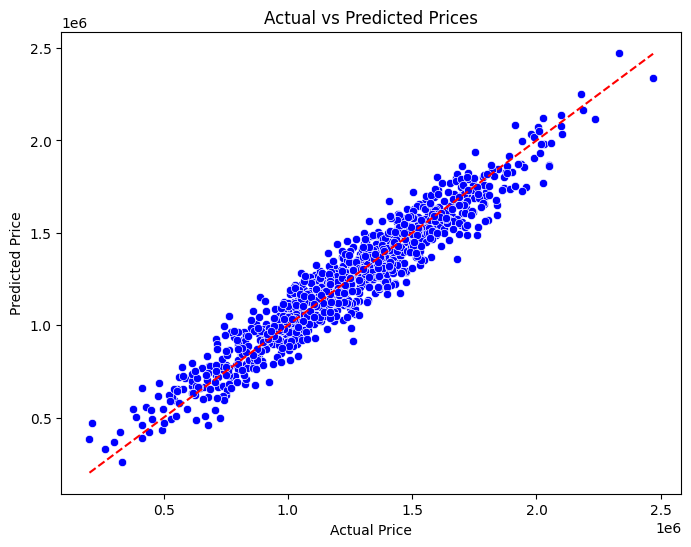

In [8]:
# Plot Actual vs Predicted values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

- Scatter plot: Visualizes actual vs predicted prices
- Red line: Represents perfect predictions (ideal case)
---

## Summary and Insights
- Intercept (β0): Predicted price when all independent variables are zero.
- Coefficients (β1, β2, ..., βn): Measure the impact of each variable on price.
- R-squared (R²): Evaluates how well the model explains variations in price.
- Visualization: Helps verify model performance.


---
# Lab Questions

## 1. What does each coefficient (β1, β2, ...) indicate?
- **Intercept (β0)**: -2635072.90  
  The base predicted value when all features are **0**.  
- **Coefficients**:  
  - β1 (e.g., `2.16522058e+01`): Impact of feature 1 on the target.  
  - β2 (e.g., `1.64666481e+05`): Impact of feature 2, increasing price by **$164,666** per unit increase.  
  - β3, β4, β5: Similarly, these coefficients show the impact of respective features on the target variable (Price), while keeping other features constant.

---

## 2. How well does the model predict Price based on R²?
- **R² Interpretation**: Measures how much variation in the dependent variable (Price) is explained by the independent variables.  
- A higher R² (close to 1) indicates a good fit, while a lower R² suggests the model might need more relevant features or adjustments.

---


## 3. Are there any patterns in the residuals that violate regression assumptions?


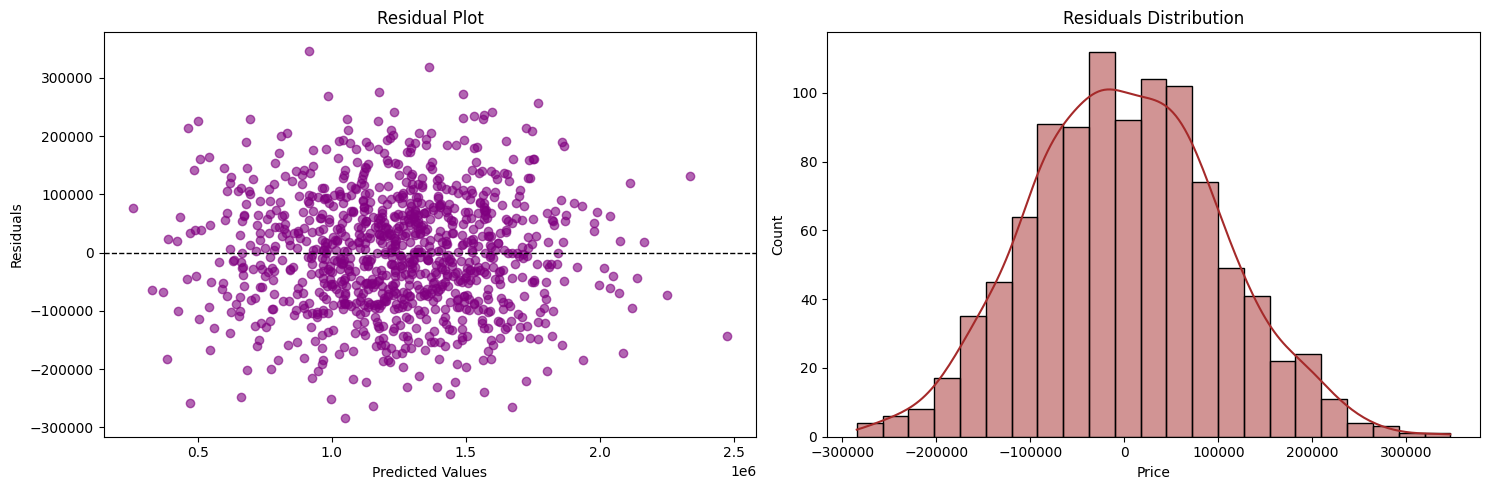

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Create subplots for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot: Residuals vs Predicted Values
axes[0].scatter(y_pred, residuals, color='purple', alpha=0.6)
axes[0].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[0].set_title('Residual Plot')
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Residuals')

# Histogram: Residual Distribution
sns.histplot(residuals, kde=True, color='brown', ax=axes[1])
axes[1].set_title('Residuals Distribution')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


- **Based on the scatter plot**:
  - **No clear patterns**: Indicates the linearity assumption holds.
  - **Random spread**: Suggests homoscedasticity (constant variance of residuals).  
- **Based on the histogram**:
  - Residuals are approximately **normally distributed**, with a slight skew, but no extreme violations.

<!-- - **Based on the scatter plot**:
  - **No clear patterns**: Indicates the linearity assumption holds.
  - **Random spread**: Suggests homoscedasticity (constant variance of residuals).  
- **Based on the histogram**:
  - Residuals are approximately **normally distributed**, with a slight skew, but no extreme violations. -->

Thank You!!